In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
path = 'sas_data2.csv'

In [16]:
df = pd.read_csv(path)

In [17]:
df.head()

,x-axis,1,2,3,4,F1
0,second,Volt,Volt,Volt,Volt,Volt
1,-5.00E-01,2.88E-01,2.93E-01,-6.93E+00,-2.45E-02,-4.98E-03
2,-5.00E-01,2.89E-01,2.93E-01,-6.88E+00,-2.45E-02,-4.21E-03
3,-4.99E-01,2.86E-01,2.93E-01,-6.83E+00,-2.45E-02,-6.48E-03
4,-4.99E-01,2.84E-01,2.92E-01,-6.80E+00,-2.51E-02,-7.81E-03


In [18]:
time = (df['x-axis'].to_numpy()[1:]).astype('float64')
signal1 = (df['1'].to_numpy()[1:]).astype('float64')
signal2 = (df['2'].to_numpy()[1:]).astype('float64')
ramp = (df['3'].to_numpy()[1:]).astype('float64')

In [30]:
error = signal2-signal1

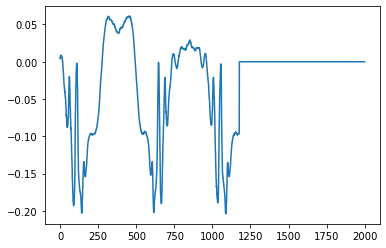

In [31]:
plt.plot(error)

In [32]:
error[np.isnan(error)] = 0
ramp[np.isnan(ramp)] = 0
signal1[np.isnan(signal1)] = 0
signal2[np.isnan(signal2)] = 0

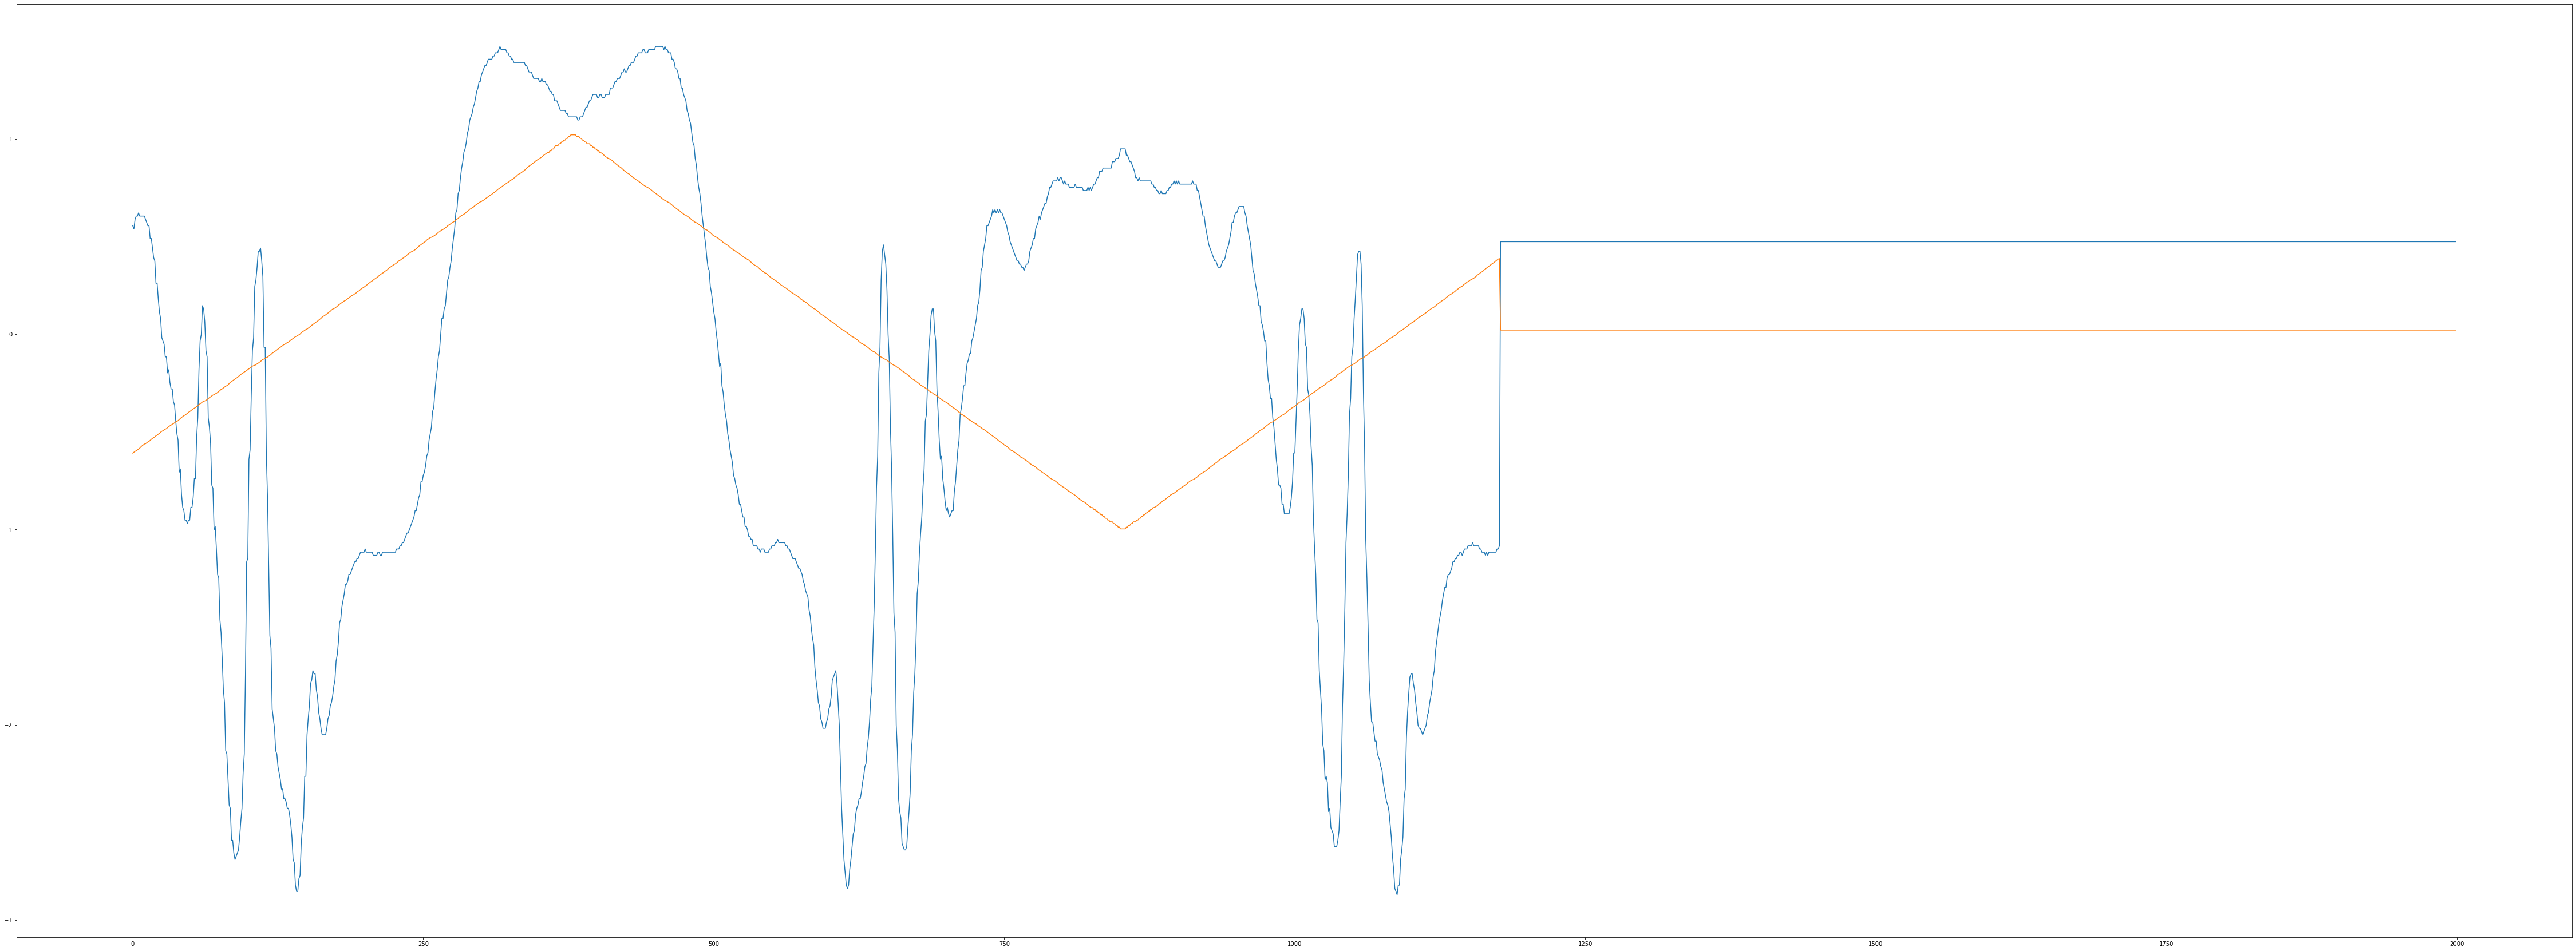

In [33]:
fig, ax = plt.subplots(figsize=(80,30))
ax.plot((error-np.mean(error))/np.max(error))
ax.plot((ramp - np.mean(ramp))/np.max(ramp))
# ax.plot((signal2 - np.mean(signal2))/np.max(signal2)*2)

In [34]:
# avg_error = []
# avg_filter = [0]*5

# deri = []
# deri_filter = [0]*20

# d_curr = 1  # -1 -> -ve and +1 -> +ve
# d_prev = 1

# max_val_index = 0
# max_val = 5
# min_val_index = 0
# min_val = 5
# min_index = []
# max_index = []
# change = False
# for i in range(0, len(error)//2):
#     avg_filter.pop(0)
#     avg_filter.append(error[i])
#     avg_error.append(np.average(avg_filter))
#     if(i>0):
#         deri_filter.pop(0)
#         deri_filter.append(avg_error[-1] - avg_error[-2])
#         deri.append(np.average(deri_filter))
#     if(avg_error[i] > max_val):
#         max_val_index = i
#         max_val = avg_error[i]
#     if(avg_error[i] < min_val):
#         min_val_index = i
#         min_val = avg_error[i]
#     if(i>1):
#         if(min_val < avg_error[i] and deri[-2]*deri[-1]<0):
#             min_index.append(min_val_index)
#             min_val = 5
#         if(max_val > avg_error[i] and deri[-2]*deri[-1]<0):
#             max_index.append(max_val_index)
#             max_val = -5

In [35]:
# min_index, max_index

In [36]:
# fig, ax = plt.subplots(1,1,figsize=(50,20))
# plt.scatter([i for i in range(0,len(avg_error[10:]))], np.asarray(avg_error[10:] - np.mean(avg_error[10:])))
# plt.scatter([i-10 for i in min_index], [avg_error[i] - np.mean(avg_error[10:]) for i in min_index])
# plt.scatter([i-10 for i in max_index], [avg_error[i] - np.mean(avg_error[10:]) for i in max_index])

In [77]:
avg_error = []         # store average of error signal
avg_filter = [0]*5    # average window

deri = []             # store derivative 
deri_filter = [0]*5    # derivative average window

max_val_index = 0
max_val = -5
min_val_index = 0
min_val = 5

min_index = []  #store local minima index
max_index = []  #store local maxima index

d = []           # storing derivative

find_max = False   # First find minima
find_min = True    # First find minima

amp_array = []    # storing amplitude
amp = 0

a = 0
for i in range(0, len(error)):
    # averaging of error signal
    avg_filter.pop(0)
    avg_filter.append(error[i])
    avg_error.append(np.average(avg_filter))
    
    if(i>0):
        # calculation and averaging of deriviative
        deri_filter.pop(0)
#         deri_filter.append(avg_error[-1] - avg_error[-2])
        deri_filter.append(error[i-1] - error[i-2])
        deri.append(np.average(deri_filter))
        
    # find maximum if find_max = True
    if(avg_error[i] > max_val and find_max):
        max_val_index = i
        max_val = avg_error[i]
    
    # find minimum if find_min = True
    if(avg_error[i] < min_val and find_min):
        min_val_index = i
        min_val = avg_error[i]
        
    if(i>1):
        # check change of slope sign to identify extremum
        if(deri[-2]*deri[-1]<0):
            d.append(i)
            
            # find local minima
            if(min_val < avg_error[i]):
                min_index.append(min_val_index)
                min_val = 5
                find_min = False
                find_max = True
            
            # find local maxima
            if(max_val > avg_error[i]):
                max_index.append(max_val_index)
                max_val = -5
                find_max = False
                find_min = True
    # calculate amplitude between consequtive maxima and minima provided minima followed by maxima
    if(len(max_index) > 0 and a<len(max_index)):
        amp = avg_error[max_index[a]] - avg_error[min_index[a]]
        amp_array.append(round((max_index[a] + min_index[a])/2))
        a+=1

In [78]:
d

[9,
 51,
 64,
 93,
 113,
 146,
 159,
 217,
 219,
 447,
 550,
 599,
 608,
 619,
 650,
 668,
 692,
 708,
 746,
 747,
 748,
 812,
 856,
 902,
 939,
 958,
 997,
 1010,
 1039,
 1059,
 1092,
 1105,
 1168]

In [79]:
min_index, max_index

([0,
  52,
  94,
  147,
  218,
  547,
  600,
  620,
  669,
  709,
  821,
  937,
  995,
  1037,
  1090,
  1111],
 [10, 65, 114, 200, 319, 557, 609, 651, 693, 799, 857, 956, 1008, 1057, 1103])

In [80]:
amp_array

[5, 58, 104, 174, 268, 552, 604, 636, 681, 754, 839, 946, 1002, 1047, 1096]

In [81]:
# i = 0
# j = 1
# thershold = 0.001
# lockpoint = 0
# while(i<j):
#     amp = max_index[j] - min_index[i]
#     if(abs(amp-threshold) < 0.3*threshold):
#         lockpoint = (max_index[i] + min_index[i])//2
#         break
#     if(max_index[i])
    

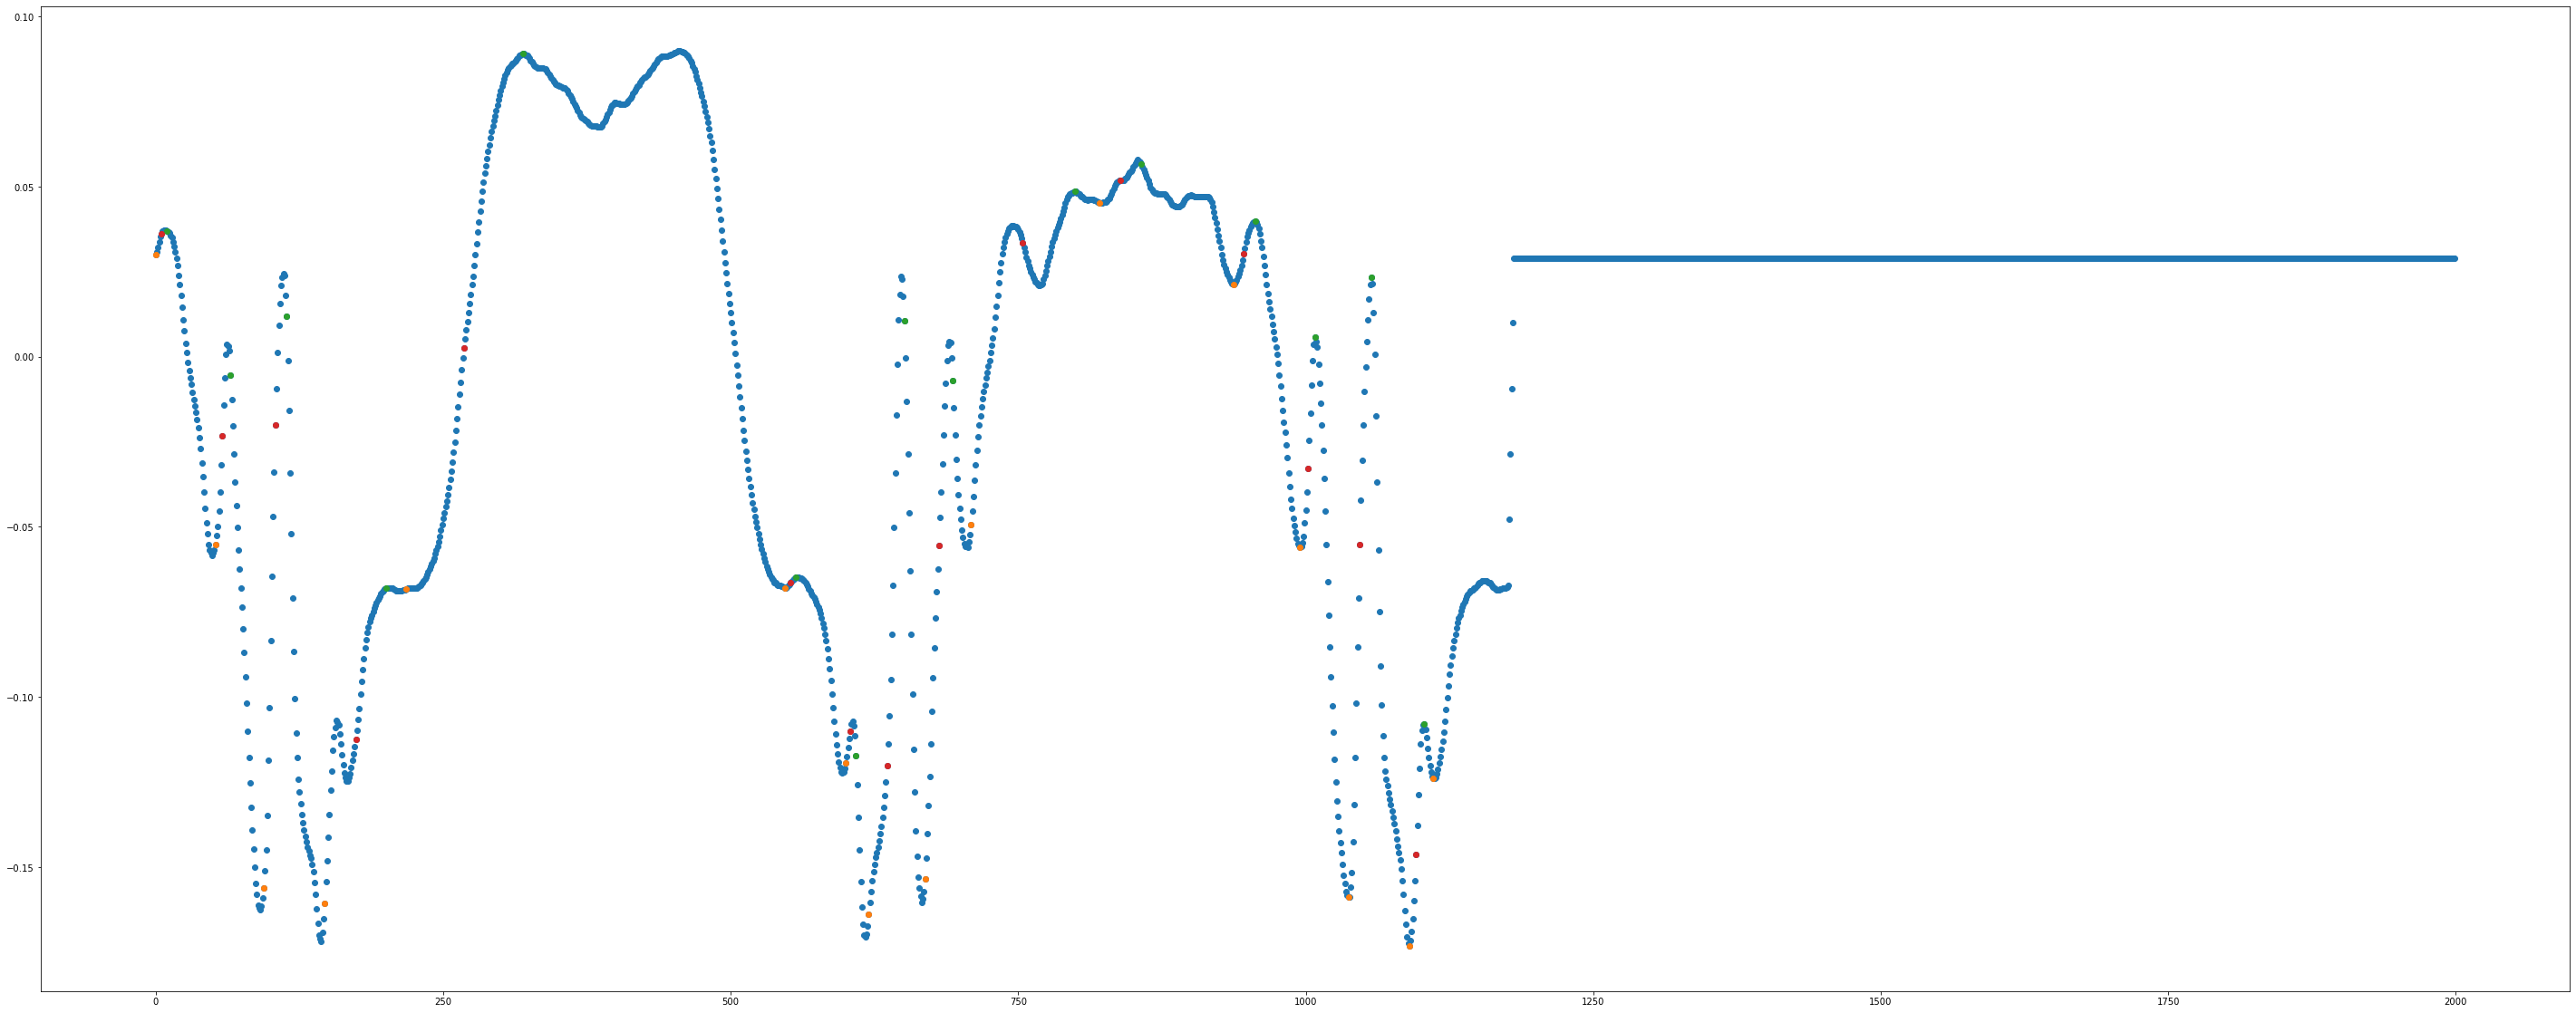

In [82]:
fig, ax = plt.subplots(1,1,figsize=(50,20))
plt.scatter([i for i in range(0,len(avg_error[:]))], np.asarray(avg_error[0:] - np.mean(avg_error[0:])))
# plt.plot((ramp[10:] - np.mean(ramp[10:]))/2000)
# plt.plot(signal1[0:525]-np.mean(signal1[0:525]))
# plt.plot(signal2[0:525]-np.mean(signal2[0:525]))
# plt.plot(avg_error[0:]-np.mean(avg_error[0:]))
plt.scatter([i for i in min_index], [avg_error[i] - np.mean(avg_error) for i in min_index])
plt.scatter([i for i in max_index], [avg_error[i] - np.mean(avg_error) for i in max_index])
plt.scatter([i for i in amp_array], [avg_error[i] - np.mean(avg_error) for i in amp_array])
# plt.scatter([i-10 for i in d], [avg_error[i] - np.mean(avg_error[10:]) for i in d])